# Causal discovery methods based on constrained functional causal models

### Additive noise models
pairwise causal discovery based on the additive noise models. 

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import math

#### Creating a data set
We are creating datasets with different functions and noise forms

In [10]:
sample_size = 1000

np.random.seed(1000)

x0 = np.random.normal(size=sample_size)
x1 = x0*x0 + np.random.normal(size=sample_size)
x2 = 2*x0 + np.random.uniform(size=sample_size)
x3 = 2*x0 + np.random.lognormal(0, 1, size=sample_size)
x4 = np.exp(x0) + np.random.normal(size=sample_size)
# np.random.laplace(0, 1, size=sample_size)
# np.random.exponential(0.5, size=sample_size)

X = pd.DataFrame(np.array([x0, x1, x2, x3, x4]).T, columns=['x0', 'x1', 'x2', 'x3', 'x4'])

X.head()

,x0,x1,x2,x3,x4
0,-0.804458,0.610390,-1.290877,-1.213124,0.864128
1,0.320932,-0.997020,1.570204,1.492458,-0.367459
2,-0.025483,1.272741,0.515492,1.404654,-0.823843
3,0.644324,0.049954,1.657323,1.821133,1.657104
4,-0.300797,1.527994,-0.172066,0.005699,0.773803


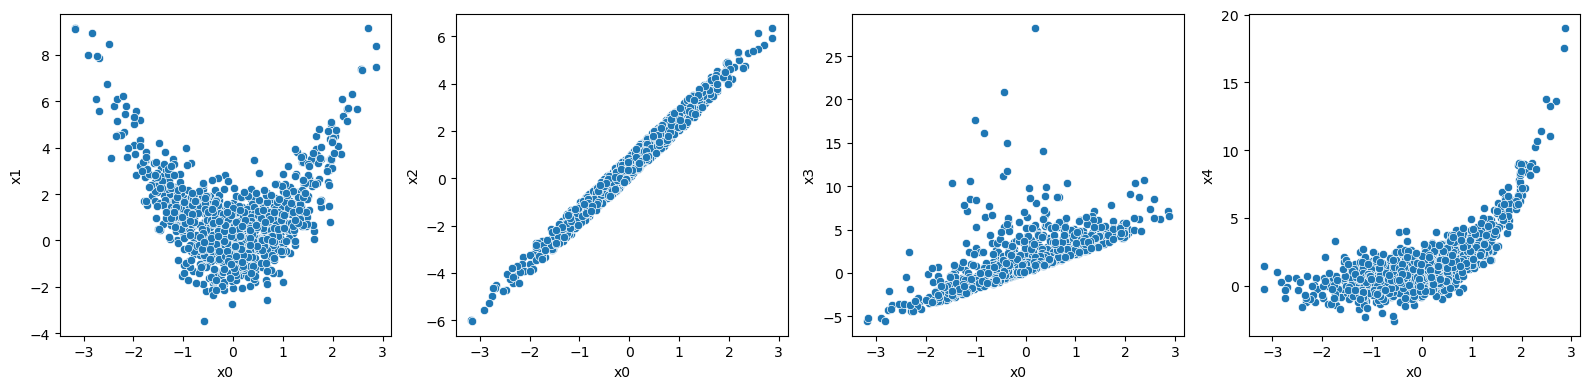

In [11]:
import matplotlib.pyplot as plt
fig, axes = plt.subplots(1, 4, figsize=(16, 4))
#sns.relplot(data=X, x="x0", y="x1")
#sns.relplot(data=X, x="x0", y="x2")
#sns.relplot(data=X, x="x0", y="x3")
#sns.relplot(data=X, x="x0", y="x4")
sns.scatterplot(data=X, x="x0", y="x1", ax=axes[0])
sns.scatterplot(data=X, x="x0", y="x2", ax=axes[1])
sns.scatterplot(data=X, x="x0", y="x3", ax=axes[2])
sns.scatterplot(data=X, x="x0", y="x4", ax=axes[3])
plt.tight_layout()
plt.show()

In [12]:
from sklearn.gaussian_process.kernels import ConstantKernel, RBF
from sklearn.gaussian_process import GaussianProcessRegressor

from causallearn.search.FCMBased.ANM.ANM import ANM
# Try to fix error warning
kernel = ConstantKernel(constant_value=10000.0) * RBF(length_scale=1.0)
gp = GaussianProcessRegressor(kernel=kernel)


anm = ANM()
x0 = np.array(X.x0).reshape(sample_size, 1)
x1 = np.array(X.x1).reshape(sample_size, 1)
p_value_foward, p_value_backward = anm.cause_or_effect(x0, x1)
print(p_value_foward)
print(p_value_backward)


0.3641219378170546
0.0


We thus obtain two p-values for each pair, one for each possible causal direction (where a high p-value corresponds to not rejecting independence, i.e., not rejecting the causal model). This means there is a causal dependency on forward direction and not in the backward direction. 

<div class="alert alert-block alert-warning">
    
Task: Check the causal dependencies in following cases and explain the causal direction:
- between x0 and x2
- between x0 and x3
- between x0 and x4
- between x1 and x4
- between x2 and x3

</div>

In [24]:
import numpy as np
from causallearn.search.FCMBased.ANM.ANM import ANM

# Adjust sample_size and p_threshold accordingly
sample_size = len(X)
p_threshold = 0.05

# Create an instance of ANM
anm = ANM()

# Define specific pairs of variables
variable_pairs = [('x0', 'x2'), ('x0', 'x3'), ('x0', 'x4'), ('x1', 'x4'), ('x2', 'x3')]

# Iterate through specified pairs of variables
for cause_col, effect_col in variable_pairs:

    # Extract variables as NumPy arrays
    cause_var = np.array(X[cause_col]).reshape(sample_size, 1)
    effect_var = np.array(X[effect_col]).reshape(sample_size, 1)

    # Perform cause and effect test
    p_value_forward, p_value_backward = anm.cause_or_effect(cause_var, effect_var)

    # Check if p-value is above the threshold
    if p_value_forward < p_threshold and p_value_backward < p_threshold:
        print(f"The causal dependencies couldn't be inferred on for {cause_col} and {effect_col} by using the additive noise model, as both forward and backward p_values were statistically significant in terms of causal dependency\n")
        print(f"P-value forward: {p_value_forward}\nP-value backward:{p_value_backward}\n----------")
    if p_value_forward < p_threshold and p_value_backward > p_threshold:
        print(f"{effect_col} causes {cause_col} with a p-value {p_value_forward}\n")
        print(f"P-value forward: {p_value_forward}\nP-value backward:{p_value_backward}\n----------")
    if p_value_backward < p_threshold and p_value_forward > p_threshold:
        print(f"{cause_col} causes {effect_col} with a p-value {p_value_backward}\n")
        print(f"P-value forward: {p_value_forward}\nP-value backward:{p_value_backward}\n----------")
    if p_value_forward > p_threshold and p_value_backward > p_threshold:
        print(f"The causal dependencies couldn't be interpreted for {cause_col} and {effect_col} by using the additive noise model, as both forward and backward p_values were above the threshold\n")
        print(f"P-value forward: {p_value_forward}\nP-value backward:{p_value_backward}\n----------")

/Users/rena/anaconda3/lib/python3.11/site-packages/sklearn/gaussian_process/kernels.py:430: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__k1__constant_value is close to the specified upper bound 1000.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(


The causal dependencies couldn't be interpreted for x0 and x2 by using the additive noise model, as both forward and backward p_values were above the threshold

P-value forward: 0.9731858643325433
P-value backward:0.26861511316077846
----------
The causal dependencies couldn't be inferred on for x0 and x3 by using the additive noise model, as both forward and backward p_values were statistically significant in terms of causal dependency

P-value forward: 9.414211724734223e-06
P-value backward:0.0
----------


/Users/rena/anaconda3/lib/python3.11/site-packages/sklearn/gaussian_process/kernels.py:430: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__k1__constant_value is close to the specified upper bound 1000.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(


x0 causes x4 with a p-value 0.0

P-value forward: 0.6074025670975552
P-value backward:0.0
----------
The causal dependencies couldn't be inferred on for x1 and x4 by using the additive noise model, as both forward and backward p_values were statistically significant in terms of causal dependency

P-value forward: 0.0
P-value backward:7.613124759275891e-06
----------
The causal dependencies couldn't be inferred on for x2 and x3 by using the additive noise model, as both forward and backward p_values were statistically significant in terms of causal dependency

P-value forward: 0.00028225094562506214
P-value backward:0.0
----------


In [ ]:
#From the suggested pairs, only for x0 and x4 we seem to have a clear cut answer using this method.
#In that case, we defined x4 = np.exp(x0) + np.random.normal(size=sample_size) so a non linear relationship with additive gaussian noise.
#ANM is best for linear relationships, but it fits well enough in this case due to the additive gaussian noise and the similarity of the
#exponential curve to a linear relationship, I guess!